# Lecture Six: Overview of Bayesian Modeling

## What is Bayesian Statistics?

Simplest Definition: Bayesian Statistics = Probability Theory (more formally, Bayesian Statistics is applicable while reasoning under uncertainty and uses the rules of probability). Our goal is to illustate the workings of Bayesian Statistics with simple examples. 

## Example One: Microwave Selection

Suppose I am shopping for a new microwave. I find two choices, both of which cost about the same amount: 
* Microwave A has 3 positive reviews and 0 negative reviews
* Microwave B has 19 positive reviews and 1 negative review

Which one should I buy?

Let us attempt to use Bayesian Statistics to answer this question. The goal is to calculate the probability that Microwave A is better than Microwave B given the observed data on reviews. More mathematically
\begin{equation*}
\mathbb{P} \left\{\text{Microwave A is better than Microwave B} ~ \vert ~ \text{observed data} \right\}
  \label{pmw1}\tag{1}
\end{equation*}

We obviously need to make some assumptions in order to calculate this probability. These assumptions will be collectively referred to as a **probability model**. For defining the probability model, it will be convenient to introduce some basic notation. Let
\begin{align*}
   \theta_A := \text{Quality of Microwave A} ~~ \text{ and } ~~ \theta_B := \text{Quality of Microwave B}
\end{align*}
$\theta_A$ and $\theta_B$ will be **parameters** inside our probability model. They are unknown and our goal is to **infer** them from the observed data on reviews. In terms of these parameters, the required probability is simply: 
\begin{align*}
  \mathbb{P} \left\{\theta_A > \theta_B ~ \vert ~ \text{observed data} \right\}
  \label{pmw2}\tag{2}
\end{align*}

Let us also use the following mathematical notation for the observed data: $+_A = 3$ (number of positive reviews for A), $-_A = 0$ (number of negative reviews for A), $+_B = 19$ (number of positive reviews for B), and $-_B = 1$ (number of negative reviews for B). The required probability can then be written as
\begin{align*}
  \mathbb{P} \left\{ \theta_A > \theta_B \vert +_A = 3, -_A = 0, +_B = 19, -_B = 1 \right\}
\end{align*}

This probability is an example of a posterior probability (in general, a posterior probability in Bayesian statistics refers to a conditional probability statement involving the parameters, conditional on the observed data). Before calculating this probability, let us aim to solve the following two simpler problems: 
1. Calculate the posterior distribution of $\theta_A$ given the reviews for A: $+_A = 3, -_A = 0$
2. Calculate the posterior distribution of $\theta_B$ given the reviews for B: $+_B = 19, -_B = 1$. 
We will then put together the answers for these and calculate \eqref{pmw2}. 

Let us focus on solving the first problem (for the microwave A). The problem for the second microwave will be entirely analogous. 

To calculate posterior probabilites, two sets of probability assumptions are generally used: 

1. Prior: Here we specify the unconditional (or marginal) probability distribution of the parameters. You can think of the prior as reflecting the uncertainty in the parameters before observing any data. In this particular problem, our parameter is $\theta_A$ which is supposed to reflect the quality of Microwave A. To specify the prior distribution for $\theta_A$, we can ask the question: "What do we think of the quality of Microwave A before observing any review data?" Here is a simple prior for $\theta_A$. Suppose that $\theta_A$ takes values between 0 and 1 with 0 representing lowest possible quality and 1 representing the highest possible quality. To further simplify things, let us assume that $\theta_A$ is a discrete variable taking values in the set $\{0, 0.01, 0.02, \dots, 0.98, 0.99, 1\}$. Now we have to assign a probability distribution over this discrete set to reflect our prior assumption on the quality of the microwave $A$. Let us assume that
\begin{align*}
   \theta_A \sim \text{uniform}\{0, 0.01, 0.02, \dots, 0.98, 0.99, 1\}. 
\end{align*}
In other words, for every $u$ in this discrete set, 
\begin{align*}
   \mathbb{P} \left\{\theta_A = u \right\} = \frac{1}{101} 
\end{align*}

2. Likelihood: Here we specify the conditional probability of the observed dataset given specific values of the unknown parameters. The likelihood is where the unknown parameters are "connected" to the observed data. In this problem, here is a simple probability assumption for writing the likelihood:  each review for microwave A is  Bernoulli with parameter $\theta_A$. Further assume independence of the different reviews. This gives the following formula for the likelihood: 
\begin{align*}
  \mathbb{P} \left\{\text{observed reviews for A} \mid \theta_A = u\right\} = \mathbb{P} \left\{+_A = 3, -_A = 0 \vert \theta_A = u\right\} = u^3 
\end{align*}

It might seem strange that we have specified a prior and likelihood without formally defining what we mean by "quality". Here are some possible interpretations for $\theta_A$ that make sense with regard to the above prior and likelihood: 
1. Probability of a positive review: Based on the likelihood, $\theta_A$ can be interpreted as the probability that someone leaves a positive review for the Microwave A. In this interpretation, the prior becomes a probability distribution for a probability (is this confusing?)
2. Population proportion of positive reviews: $\theta_A$ is sometimes interpreted as the proportion of positive reviews if everyone in the population leaves a review for Microwave A. 
3. Performance interpretation: $\theta_A$ can be interpreted as the proportion of usage instances where a specific user will be satisfied with the performance of the microwave. 

Which of these (and possibly other) interpretations do you like? and why?

Analogously, we have the following prior and likelihood for B: 
\begin{align*}
  \theta_B \sim \text{uniform}\{0, 0.01, 0.02, \dots, 0.98, 0.99, 1\} ~~ \text{ and } ~~  \mathbb{P} \left\{\text{observed reviews for B} \mid \theta_B = u \right\} = u^{19} (1 - u) 
\end{align*}
These priors and likelihoods can be calculated in Python using the code below. 

In [1]:
import numpy as np
#Specify the priors for theta_A and theta_B
#First let us list out all possible values for theta_A and theta_B
resolution = 0.01
theta_A_values = np.arange(0, 1+resolution, resolution)
print(theta_A_values)
theta_B_values = np.arange(0, 1+resolution, resolution)
print(theta_B_values)
#Now we specify the prior probabilities
prior_A = np.full(len(theta_A_values), 1/len(theta_A_values))
prior_B = np.full(len(theta_B_values), 1/len(theta_B_values))
print(prior_A)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95

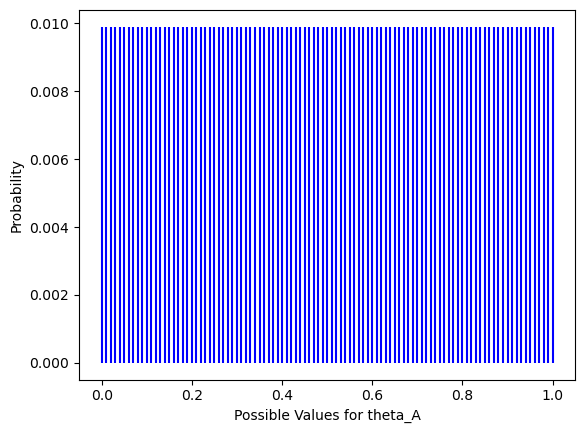

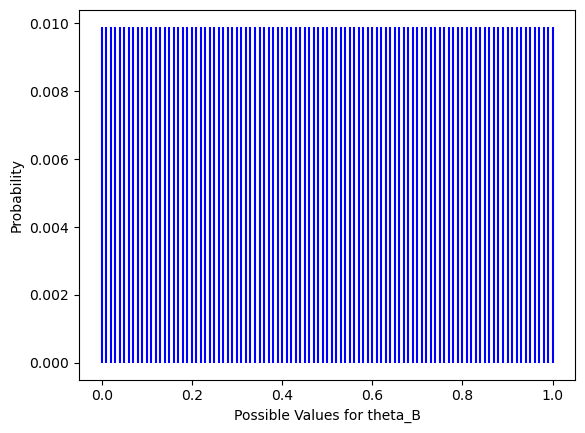

In [2]:
#Plot the prior probabilities:
import matplotlib.pyplot as plt

plt.vlines(theta_A_values, ymin = 0, ymax = prior_A, color = 'b')
plt.xlabel("Possible Values for theta_A")
plt.ylabel("Probability")
plt.show()

plt.vlines(theta_B_values, ymin = 0, ymax = prior_B, color = 'b')
plt.xlabel("Possible Values for theta_B")
plt.ylabel("Probability")
plt.show()


Here is how the likelihood is computed and visualized. 

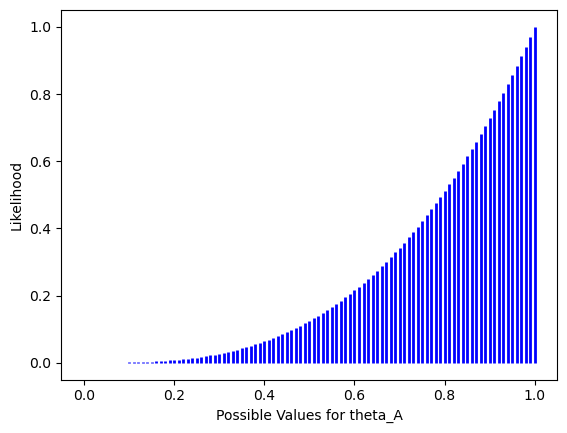

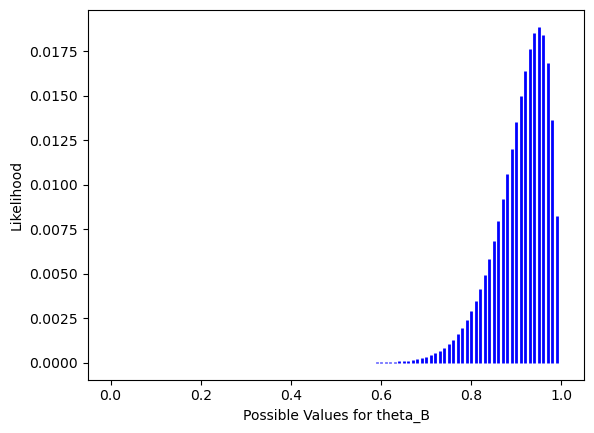

In [3]:
#Likelihood Computation (this is the only place where the observed data enters the calculation)
#Since the likelihood is of product form (i.e., a function of theta_A multiplied by another function of theta_B), 
#we can compute the likelihood of A and likelihood of B separately. Overall likelihood is the product of these two separate likelihoods.
plus_A = 3
minus_A = 0
likelihood_A = (theta_A_values ** plus_A) * ((1 - theta_A_values) ** minus_A)
plus_B = 19
minus_B = 1
likelihood_B = (theta_B_values ** plus_B) * ((1 - theta_B_values) ** minus_B)

#Let us plot the likelihoods 
plt.vlines(theta_A_values, ymin = 0, ymax = likelihood_A, color = 'b', linewidth = 2)
plt.xlabel("Possible Values for theta_A")
plt.ylabel("Likelihood")
plt.show()

plt.vlines(theta_B_values, ymin = 0, ymax = likelihood_B, color = 'b', linewidth = 2)
plt.xlabel("Possible Values for theta_B")
plt.ylabel("Likelihood")
plt.show()

#Note that the scales in the two plots are different (likelihoods across different problems cannot be directly compared)

With the specifications for the prior and likelihood, we can proceed to calculate posterior probabilities. This is done via the Bayes rule. To calculate the posterior distribution of $\theta_A$, write
\begin{align*}
  \mathbb{P}\{\theta_A = u \mid \text{observed reviews for A}\} = \frac{\mathbb{P}\{\theta_A = u\} \mathbb{P}\{\text{observed reviews for A} \mid \theta_A = u\}}{\mathbb{P} \{\text{observed reviews for A}\}} \label{br1}\tag{3}
\end{align*}
In the fraction on the right hand side above, numerator = prior $\times$ likelihood, and 
\begin{align*}
  \text{denominator} &= \text{marginal probability of the observed reviews for A} \\
  &= \mathbb{P} \{\text{observed reviews for A without any conditioning on } \theta_A\} \\
  &= \sum_{v} \mathbb{P} \{\theta_A = v\}\mathbb{P}\{\text{observed reviews for A} \mid \theta_A = v\}
\end{align*}
We can thus rewrite \eqref{br1} as
\begin{align*}
  \mathbb{P}\{\theta_A = u \mid \text{observed reviews for A}\} = \frac{\mathbb{P}\{\theta_A = u\} \mathbb{P}\{\text{observed reviews for A} \mid \theta_A = u\}}{\sum_{v} \mathbb{P} \{\theta_A = v\}\mathbb{P}\{\text{observed reviews for A} \mid \theta_A = v\}} \label{br2}\tag{4}
\end{align*}
The numerator on the right hand side above (prior $\times$ likelihood) is often referred to as the **unnormalized** posterior. Another commonly written relation is: 
\begin{align*}
   \text{posterior} \propto \text{prior} \times \text{likelihood}
\end{align*}
where the symbol $\propto$ is read as "proportional to". In this case, this means
\begin{align*}
   \mathbb{P}\{\theta_A = u \mid \text{observed reviews for A}\} \propto \mathbb{P}\{\theta_A = u\} \mathbb{P}\{\text{observed reviews for A} \mid \theta_A = u\}. 
\end{align*}
This is just a loose version of \eqref{br2}. The idea is that the term that is missing ($\sum_{v} \mathbb{P} \{\theta_A = v\}\mathbb{P}\{\text{observed reviews for A} \mid \theta_A = v\}$) does not depend on $u$ and can be recovered by the fact that the left hand side needs to sum to one over $u$. 

Plugging in our formulae for the prior and likelihood, we get
\begin{align*}
   \mathbb{P}\{\theta_A = u \mid \text{observed reviews for A}\} = \frac{\frac{1}{101} u^3}{\sum_{v \in \{0, 0.01, 0.02, \dots, 0.98, 0.99, 1\}} \frac{1}{101} v^3}
\end{align*}
for each $u \in \{0, 0.01, \dots, 0.99, 1\}$. Analogously, we have
\begin{align*}
\mathbb{P}\{\theta_B = u \mid \text{observed reviews for B}\} = \frac{\frac{1}{101} u^{19} (1-u)}{\sum_{v \in \{0, 0.01, 0.02, \dots, 0.98, 0.99, 1\}} \frac{1}{101} v^{19} (1-v)}
\end{align*}
These posterior probabilities can be computed in Python as follows. 

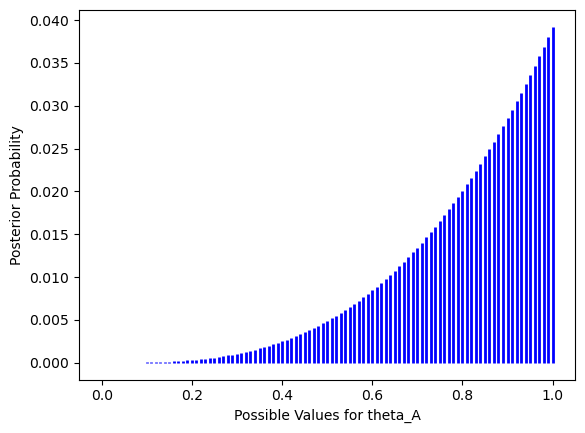

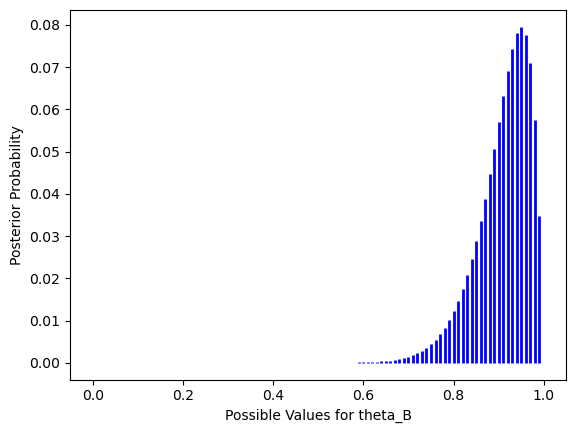

In [4]:
#Posterior Probability Computation
posterior_A_unnormalized = prior_A * likelihood_A
posterior_A = posterior_A_unnormalized / np.sum(posterior_A_unnormalized)
#Let us plot the likelihoods 
plt.vlines(theta_A_values, ymin = 0, ymax = posterior_A, color = 'b', linewidth = 2)
plt.xlabel("Possible Values for theta_A")
plt.ylabel("Posterior Probability")
plt.show()

posterior_B_unnormalized = prior_B * likelihood_B
posterior_B = posterior_B_unnormalized / np.sum(posterior_B_unnormalized)
#Let us plot the likelihoods 
plt.vlines(theta_B_values, ymin = 0, ymax = posterior_B, color = 'b', linewidth = 2)
plt.xlabel("Possible Values for theta_B")
plt.ylabel("Posterior Probability")
plt.show()

Let us now compute the posterior probability that $\theta_A < \theta_B$. For this, we need the joint posterior distribution of both the parameters $\theta_A$ and $\theta_B$. If we assume that $\theta_A$ and $\theta_B$ are **a priori** independent, then they will be independent **a posteriori** as well and we can write
\begin{align*}
  \mathbb{P} \left\{\theta_A = u_A, \theta_B = u_B \mid \text{observed reviews for both} \right\} &= \mathbb{P}\{\theta_A = u_A \mid \text{observed reviews for A}\} \times \mathbb{P}\{\theta_B = u_B \mid \text{observed reviews for B}\} \\
  &= \frac{\frac{1}{101} u_A^3}{\sum_{v_A \in \{0, 0.01, 0.02, \dots, 0.98, 0.99, 1\}} \frac{1}{101} v_A^3} \times \frac{\frac{1}{101} u_B^{19} (1-u_B)}{\sum_{v_B \in \{0, 0.01, 0.02, \dots, 0.98, 0.99, 1\}} \frac{1}{101} v_B^{19} (1-v_B)}
\end{align*}
From here the required posterior probability that $\theta_A < \theta_B$ is easily calculated as
\begin{align*}
\mathbb{P} \left\{\theta_A < \theta_B \mid \text{observed reviews for both} \right\} &= \sum_{u_A < u_B} \mathbb{P} \left\{\theta_A = u_A, \theta_B = u_B \mid \text{observed reviews for both} \right\} \\
&= \frac{\sum_{u_A < u_B}\frac{1}{101} u_A^3 \frac{1}{101} u_B^{19} (1-u_B)}{\sum_{v_A, v_B}\frac{1}{101} v_A^3 \frac{1}{101} v_B^{19} (1-v_B)}
\end{align*}
We can similarly write down related posterior probabilities like that of $\theta_A \leq \theta_B$: 
\begin{align*}
\mathbb{P} \left\{\theta_A \leq \theta_B \mid \text{observed reviews for both} \right\} &= \sum_{u_A \leq u_B} \mathbb{P} \left\{\theta_A = u_A, \theta_B = u_B \mid \text{observed reviews for both} \right\} \\
&= \frac{\sum_{u_A \leq u_B}\frac{1}{101} u_A^3 \frac{1}{101} u_B^{19} (1-u_B)}{\sum_{v_A, v_B}\frac{1}{101} v_A^3 \frac{1}{101} v_B^{19} (1-v_B)}
\end{align*}
These probabilities can be calculated in Python as follows:

In [5]:
#Required Probability Calculation
#Joint Probability Matrix
joint_posterior = np.outer(posterior_A, posterior_B)
print(joint_posterior.shape)
print(joint_posterior)

#Posterior probability that theta_A <= theta_B
probAleqB = np.sum(np.triu(joint_posterior))
print(probAleqB)
#Posterior probability that theta_A >= theta_B
probAgeqB = np.sum(np.tril(joint_posterior))
print(probAgeqB)
#Posterior probability that theta_A < theta_B
probAstrictlyworseB = np.sum(np.triu(joint_posterior, k = 1))
print(probAstrictlyworseB)
#Posterior probability that theta_A > theta_B
probAstrictlybetterB = np.sum(np.tril(joint_posterior, k = -1))
print(probAstrictlybetterB)
#Posterior probability that theta_A = theta_B
probAeqB = np.trace(joint_posterior)
print(probAeqB)

(101, 101)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.63614512e-45 8.49146490e-40 ... 2.25170794e-09
  1.36538561e-09 0.00000000e+00]
 [0.00000000e+00 1.30891609e-44 6.79317192e-39 ... 1.80136635e-08
  1.09230849e-08 0.00000000e+00]
 ...
 [0.00000000e+00 1.53992669e-39 7.99209883e-34 ... 2.11928950e-03
  1.28509002e-03 0.00000000e+00]
 [0.00000000e+00 1.58754997e-39 8.23925990e-34 ... 2.18482996e-03
  1.32483230e-03 0.00000000e+00]
 [0.00000000e+00 1.63614512e-39 8.49146490e-34 ... 2.25170794e-03
  1.36538561e-03 0.00000000e+00]]
0.7001613554736524
0.3296409466685906
0.6703590533314093
0.29983864452634756
0.02980230214224308


The probability that B is at least as good as A is 0.70. The probability that A is at least as good as B is 0.33. The probability that B is strictly better than A is 0.67. The probability that A is strictly better than B is 0.3. The probability that A and B are equally good is 0.03. 

The value of Bayesian analysis in this simple problem is that it assigns specific probabilities to the intuitive notion that Microwave B is better than A. 

Repeat the above analysis and see how the results change for: 
1. Smaller resolution (say 0.001). 
2. Multiply all ratings by a constant factor, say 10 i.e., $+_A = 30, -_A = 0$ and $+_B = 190, -_B = 10$. 

### Analysis with Continuous Priors

Most often, this analysis is done with continuous priors as opposed to the discretized priors as we have used. More specifically, instead of the discrete prior: 
\begin{align*}
\theta_A, \theta_B \overset{\text{i.i.d}}{\sim} \text{uniform}\{0, 0.01, 0.02, \dots, 0.98, 0.99, 1\},
\end{align*}
one uses the continuous uniform prior on the interval $[0, 1]$: 
\begin{align*}
  \theta_A, \theta_B \overset{\text{i.i.d}}{\sim} \text{uniform}[0, 1]. 
\end{align*}
Recall that continuous distributions are usually described in terms of probability density functions. The continuous distribution on $[0, 1]$ corresponds to the probability density function that is equal to 1 in the entire range $[0, 1]$. Thus
\begin{align*}
  f_{\theta_A}(u) = I\{0 \leq u \leq 1\} ~~ \text{ and } ~~ f_{\theta_B}(u) = I\{0 \leq u \leq 1\}. 
\end{align*}
The likelihood stays the same as before. The posterior distributions for $\theta_A$ and $\theta_B$ will also be described in terms of probability density functions. These posterior density functions will be calculated from the prior density functions and the likelihoods by Bayes rule: 
\begin{align*}
   f_{\theta_A \mid \text{observed reviews for A}}(u) &= \frac{f_{\theta_A}(u) \mathbb{P}\{\text{observed reviews for A} \mid \theta_A = u\}}{\mathbb{P} \{\text{observed reviews for A}\}} \\
   &= \frac{f_{\theta_A}(u) \mathbb{P}\{\text{observed reviews for A} \mid \theta_A = u\}}{\int f_{\theta_A}(v) \mathbb{P}\{\text{observed reviews for A} \mid \theta_A = v\} dv} \\
   &= \frac{I\{0 \leq u \leq 1\} \times u^3}{\int I\{0 \leq v \leq 1\} \times v^3 dv} = \frac{I\{0 \leq u \leq 1\} \times u^3}{\int_0^1 v^3 dv} = 4 I\{0 \leq u \leq 1\}u^3. 
\end{align*}
Similarly
\begin{align*}
  f_{\theta_B \mid \text{observed reviews for B}}(u) = \frac{I\{0 \leq u \leq 1\} \times u^{19} (1-u)}{\int I\{0 \leq v \leq 1\} \times v^{19} (1-v) dv} = \frac{I\{0 \leq u \leq 1\}  u^{19} (1-u)}{\int_0^1 v^{19} (1-v) dv} = 420 I\{0 \leq u \leq 1\} u^{19} (1-u)
\end{align*}
Both the above posterior densities are special cases of densities corresponding to the Beta distribution. For two positive real numbers $a$ and $b$, the $\text{Beta}(a, b)$ distribution corresponds to the density: 
\begin{align*}
   f_{\text{Beta}(a, b)}(u) = \frac{u^{a-1} (1-u)^{b-1} I\{0 \leq u \leq 1\}}{\int_0^1 u^{a-1} (1-u)^{b-1} du}
\end{align*}
We can thus write:
\begin{align*}
  \theta_A \mid \text{observed reviews for A} \sim \text{Beta}(+_A + 1, -_A + 1) = \text{Beta}(4, 1)  ~~ \text{ and } ~~ \theta_B \mid \text{observed values for B} \sim  \text{Beta}(+_B + 1, -_B + 1) = \text{Beta}(20, 2). 
\end{align*}

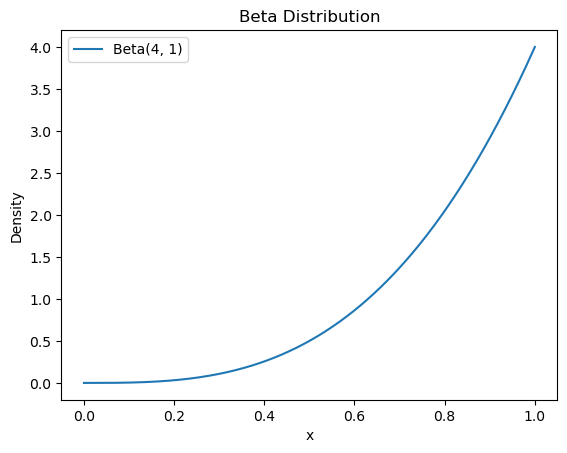

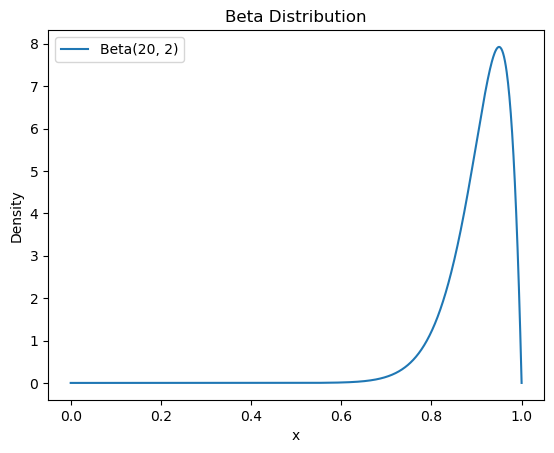

In [6]:
#Plotting the Posterior Beta densities for theta_A and theta_B:
from scipy.stats import beta
a = plus_A + 1
b = minus_A + 1
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, a, b)
plt.plot(x, y, label = f"Beta({a}, {b})")
plt.title("Beta Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

a = plus_B + 1
b = minus_B + 1
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, a, b)
plt.plot(x, y, label = f"Beta({a}, {b})")
plt.title("Beta Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()
#These continuous posterior densities look very similar to the ones we obtained previously with discrete priors

With the continuous posterior densities, we can calculate the required posterior probability that $\theta_A < \theta_B$ as follows: 
\begin{align*}
  &\mathbb{P}\left\{\theta_A < \theta_B \mid \text{observed reviews for both} \right\} \\
  &= \int \int I\{u < v\} 4 u^3 I\{0 \leq u \leq 1\} 420 v^{19} (1-v) I\{0 \leq v \leq 1\} du dv \\
  &= 1680 \int_0^1 \left(\int_0^v u^3 du \right) v^{19} (1-v) dv \\
  &= 420 \int_0^1 v^{23} (1 - v) dv \\
  &= 420 \left( \int_0^1 v^{23} dv - \int_0^1 v^{24} dv \right) = 420 \left(\frac{1}{24} - \frac{1}{25} \right) = 0.7
\end{align*}
Thus we can assign a posterior probability of 0.7 for the proposition that microwave B is better than microwave A.

It is nice that we were able to calculate the required posterior probability in closed form. In other situations, say when $+_A = 30, -_A = 0, +_B = 190, -_B = 10$, it might be difficult or tedious to evaluate the integrals involved. In such situations, it makes sense to approximate the integral by Monte Carlo. Here is a Monte Carlo estimate of $\mathbb{P}\left\{\theta_A < \theta_B \mid \text{observed reviews for both} \right\}$:

1. Fix a large value of $N$ (say $N = 20000$)
2. Generate N i.i.d samples $\theta_A^{(1)}, \dots, \theta_A^{(N)}$ from the posterior distribution $\text{Beta}(+_A + 1, -_A + 1) = \text{Beta}(4, 1)$ of $\theta_A$. 
3. Generate N i.i.d samples $\theta_B^{(1)}, \dots, \theta_B^{(N)}$ from the posterior distribution $\text{Beta}(+_B + 1, -_B + 1) = \text{Beta}(20, 2)$ of $\theta_B$. 
4. The required posterior probability of $\theta_A < \theta_B$ is approximated by the proportion of pairs $(\theta_A^{(i)}, \theta_B^{(i)})$ for which $\theta_A^{(i)} < \theta_B^{(i)}$:
\begin{align*}
  \frac{1}{N} \sum_{i=1}^N I\{\theta_A^{(i)} < \theta_B^{(i)}\}
\end{align*}
This can be done in Python as follows.

In [7]:
#With the continuous prior. 
#Posterior for theta_A is Beta(+_A + a, -_A + b) and the posterior for theta_B is Beta(+_B + a, -_B + b). 
#To calculate the posterior probability that theta_A is strictly smaller than theta_B, we can discretize as before.
#An alternative approach uses Monte Carlo.
N = 20000
plus_A = 3
minus_A = 0
plus_B = 19
minus_B = 1
a = 1
b = 1
beta_samples_1 = np.random.beta(plus_A + a, minus_A + b, N)
beta_samples_2 = np.random.beta(plus_B + a, minus_B + b, N)
proportion_AleqB = np.sum(beta_samples_1 < beta_samples_2)/N
print(proportion_AleqB) 

0.70115


In the next class, we shall look at a more general Bayesian analysis of this problem with possibly non-uniform Beta priors. We shall look at a more realistic data example where Bayesian analysis gives significantly improved results. 